In [1]:
import ble2lsl
from ble2lsl.devices import muse2016
from wizardhat import acquire, plot, transform

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Emulate a Muse 2016 using `ble2lsl.Dummy` and set up an `acquire.Receiver` to receive the dummy data over LSL

In [2]:
device = muse2016
dummy_outlet = ble2lsl.Dummy(device)
receiver = acquire.Receiver()

Using source with ID Dummy-OuterSpace


To test the filter, we want to check out the PSD of the signal pre- and post-filter.
1. Create a `transform.Filter` that with the raw EEG stream as a buffer_in
2. Create two `transform.PSD` objects: one with the raw EEG as a buffer_in, and one with the buffer_out of the filter as a buffer_in.

In [106]:
filter = transform.Filter(receiver.buffers['EEG'], 1, 50,'low')
pre_filter = transform.PSD(receiver.buffers['EEG'])
post_filter = transform.PSD(filter.buffer_out)

First, let's visualize the raw signal and the filtered signal. Let's grab some samples from the `buffer_in` and the `buffer_out` of the `filter` object...

In [112]:
channel_to_view = 'TP9'
samples_to_view = 2000
raw = filter.buffer_in.data[channel_to_view][-samples_to_view:-1]
time_raw = filter.buffer_in.get_timestamps()[-samples_to_view:-1]
filt = filter.buffer_out.data[channel_to_view][-samples_to_view:-1]
time_filt = filter.buffer_out.get_timestamps()[-samples_to_view:-1]

...and plot them. These signals should have their timesteps aligned, and you may see that the filtered signal is lagging a bit behind the raw signal depending whether the `buffer_out` was updated when you ran the last cell.

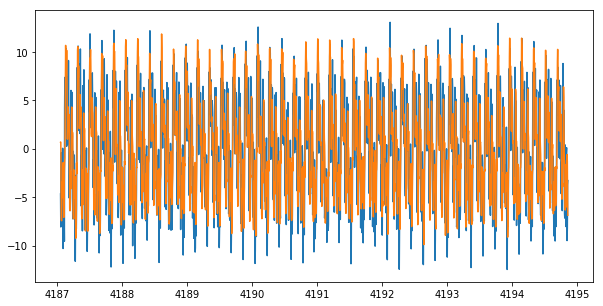

In [113]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time_raw,raw,label='raw')
ax.plot(time_filt,filt,label='filtered')

Visualize the `pre_filter` and `post_filter` PSD buffers:

In [109]:
pre_filter.buffer_out.data['TP9'].shape

(2560, 129)

In [110]:
# timestamp of most recent psd
channel_to_view = 'TP9'
timestamp_to_view = pre_filter.buffer_out.get_timestamps(1)

# grab psd pre- and post-filter
pre_filter_data = pre_filter.buffer_out.data[['time',channel_to_view]]
pre_filter_psd = pre_filter_data[pre_filter_data['time']==timestamp_to_view]

post_filter_data = post_filter.buffer_out.data[['time',channel_to_view]]
post_filter_psd = post_filter_data[post_filter_data['time']==timestamp_to_view]

In [1]:
# plot both
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(0,129),pre_filter_psd[channel_to_view].T)
ax.plot(np.arange(0,129),post_filter_psd[channel_to_view].T)

NameError: name 'plt' is not defined